# Phân tích dữ liệu kinh doanh - Sales Analysis

**Question 1**: Tháng nào kinh doanh tốt nhất? Doanh thu tháng đó là bao nhiêu?

**Question 2**: Thành phố nào bán được nhiều sản phẩm (product) nhất?

**Question 3**: Khoảng thời gian nào ta nên hiển thị quảng cáo để tăng khả năng mua hàng của khách?

**Question 4**: Sản phẩm được bán nhiều nhất là gì? Tại sao?

#### Xin quyền truy cập Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/ggdrive')

Drive already mounted at /content/ggdrive; to attempt to forcibly remount, call drive.mount("/content/ggdrive", force_remount=True).


#### Khai báo thư viện sử dụng

In [ ]:
import os
import pandas as pd

#### Tổng hợp dữ liệu kinh doanh các tháng vào 1 file duy nhất

In [ ]:
path = "/content/ggdrive/MyDrive/Python For Data Analysis/Bài 20/Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path + "/" + file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("/content/ggdrive/MyDrive/Python For Data Analysis/Bài 20/all_data.csv", index=False)

#### Đọc dữ liệu

In [ ]:
all_data = pd.read_csv("/content/ggdrive/MyDrive/Python For Data Analysis/Bài 20/all_data.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


### Làm sạch dữ liệu
Bước đầu tiên trước bất cứ phân tích nào, bạn cần làm sạch dữ liệu. Để làm sạch dữ liệu, bạn cần xem tổng quan về dữ liệu để đưa ra quyết định. Có thể bạn chưa phát hiện hết các lỗi. Cứ thực hiện các bước xử lý, nếu gặp lỗi, bạn quay trở lại bước xử lý làm sạch dữ liệu để loại bỏ lỗi đó

##### Đếm số dữ liệu trống

In [ ]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

##### Lấy ra các hàng có ít nhất 1 cột trống (xem lại lab 11)

In [ ]:
all_data[all_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184390,NaN,NaN,NaN,NaN,NaN,NaN
184779,NaN,NaN,NaN,NaN,NaN,NaN
185239,NaN,NaN,NaN,NaN,NaN,NaN
185614,NaN,NaN,NaN,NaN,NaN,NaN


##### Xóa các dòng có giá trị NaN

In [ ]:
all_data = all_data.dropna()
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


##### Một số dòng không có dữ liệu bán hàng, mà lặp lại nội dung như header. Cần tìm ra các dòng này

In [ ]:
error_data = all_data[all_data['Order Date'].str.startswith('Or')]
error_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### Và loại bỏ các dòng đó

In [ ]:
all_data = all_data[~all_data['Order Date'].str.startswith('Or')].copy()
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


#### Định kiểu dữ liệu chuẩn cho các cột

In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


### Thêm các cột mới, làm rõ dữ liệu, giúp dễ dàng xử lý sau đó

#### Thêm cột Month - tháng

In [ ]:
import numpy as np
from datetime import datetime

# Cách 1: Nhanh hơn với Numpy
def func(date):
  date=datetime.strptime(date, '%m/%d/%y %H:%M')
  return date.month

month_handler = np.frompyfunc(func, 1, 1)

all_data['Month'] = month_handler(all_data['Order Date'])
all_data

# Cách 2
# all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
# all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10
186848,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10


#### Thêm cột City - Thành phố

In [ ]:
def func(address):
  city = address.split(",")[1].strip(" ")
  state = address.split(",")[2].split(" ")[1]
  return f"{city} ({state})"

city_handler = np.frompyfunc(func, 1, 1)

all_data['City'] = city_handler(all_data['Purchase Address'])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA)
...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,San Francisco (CA)
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,Los Angeles (CA)
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,San Francisco (CA)
186848,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,Seattle (WA)


## Khai phá dữ liệu!

#### **Question 1**: Tháng nào kinh doanh tốt nhất? Doanh thu tháng đó là bao nhiêu?

Thêm cột Sales

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City (NY),1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City (NY),600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City (NY),11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA),149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA),11.95
...,...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,San Francisco (CA),3.84
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,Los Angeles (CA),11.99
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,San Francisco (CA),3.84
186848,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,Seattle (WA),700.00


Tính tổng Sales các tháng

In [ ]:
monthly_sales_df = all_data.groupby(['Month']).sum()
monthly_sales_df

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


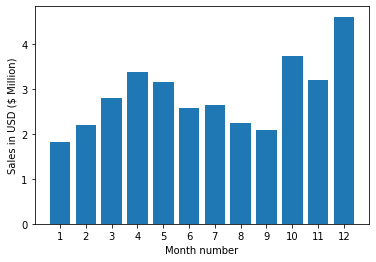

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

months = range(1,13)

plt.bar(months, monthly_sales_df['Sales']/1000000)
plt.xticks(months)
plt.ylabel('Sales in USD ($ Million)')
plt.xlabel('Month number')
plt.show()

#### **Question 2**: Thành phố nào bán được nhiều sản phẩm (product) nhất?

In [ ]:
city_sales_df = all_data.groupby(['City']).sum()
city_sales_df

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,2779908.20,2795498.58
Austin (TX),11153,1809873.61,1819581.75
Boston (MA),22528,3637409.77,3661642.01
Dallas (TX),16730,2752627.82,2767975.40
Los Angeles (CA),33289,5421435.23,5452570.80
New York City (NY),27932,4635370.83,4664317.43
Portland (ME),2750,447189.25,449758.27
Portland (OR),11303,1860558.22,1870732.34
San Francisco (CA),50239,8211461.74,8262203.91


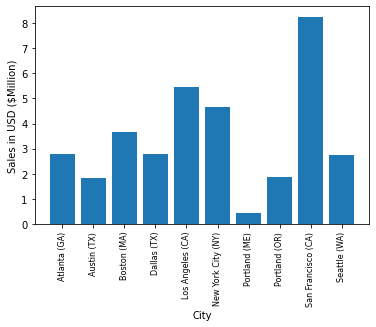

In [ ]:
import matplotlib.pyplot as plt

keys = city_sales_df.index

plt.bar(keys, city_sales_df['Sales']/1000000)
plt.ylabel('Sales in USD ($Million)')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### **Question 3**: Khoảng thời gian nào ta nên hiển thị quảng cáo để tăng khả năng mua hàng của khách?

Thêm cột Hour

In [ ]:
# Cách 1: Nhanh hơn với Numpy
def func(date):
  date=datetime.strptime(date, '%m/%d/%y %H:%M')
  return date.hour, date.minute

hour_handler = np.frompyfunc(func, 1, 2)

all_data['Hour'], all_data['Minute'] = hour_handler(all_data['Order Date'])
all_data

# Cách 2
# all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
# all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
# all_data['Count'] = 1
# all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City (NY),1700.00,0,1,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City (NY),600.00,7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City (NY),11.95,18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA),149.99,15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA),11.95,12,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,San Francisco (CA),3.84,4,32,1
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,Los Angeles (CA),11.99,22,0,1
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,San Francisco (CA),3.84,20,58,1
186848,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,Seattle (WA),700.00,17,21,1


In [ ]:
hourly_sale_df = all_data.groupby(['Hour']).count()
hourly_sale_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


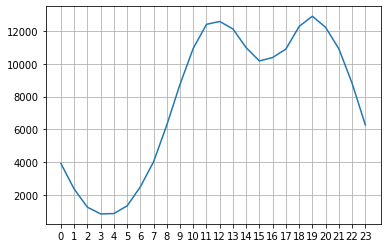

In [ ]:
keys = hourly_sale_df.index

plt.plot(keys, hourly_sale_df['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

Với đồ thị trên, ta nên quảng cáo vào khoảng 11h hoặc 7h, khi số lượng sản phẩm được mua đạt đỉnh

#### **Question 4**: Sản phẩm được bán nhiều nhất là gì? Bạn có biết lý do tại sao không?

In [ ]:
product_df = all_data.groupby('Product').sum()
product_df

,Quantity Ordered,Price Each,Sales,Count
Product,,,,
20in Monitor,4129,451068.99,454148.71,4101
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,6230
27in FHD Monitor,7550,1125974.93,1132424.50,7507
34in Ultrawide Monitor,6199,2348718.19,2355558.01,6181
AA Batteries (4-pack),27635,79015.68,106118.40,20577
AAA Batteries (4-pack),31017,61716.59,92740.83,20641
Apple Airpods Headphones,15661,2332350.00,2349150.00,15549
Bose SoundSport Headphones,13457,1332366.75,1345565.43,13325
Flatscreen TV,4819,1440000.00,1445700.00,4800


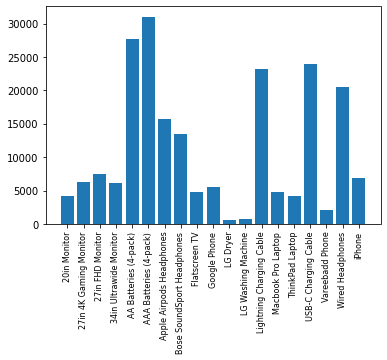

In [ ]:
keys = product_df.index

plt.bar(keys, product_df['Quantity Ordered'])
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

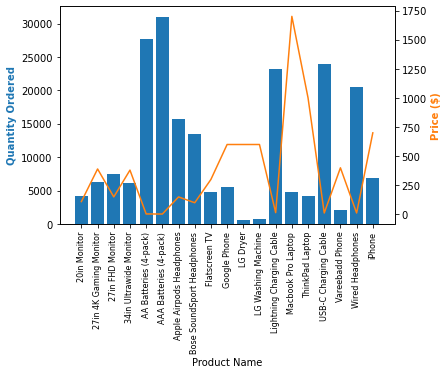

In [ ]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, product_df['Quantity Ordered'], color='#1f77b4')
ax2.plot(keys, prices, color='#ff7f0e')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='#1f77b4', weight='bold')
ax2.set_ylabel('Price ($)', color='#ff7f0e', weight='bold')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()